## Determine correction Matrix to undistort markers

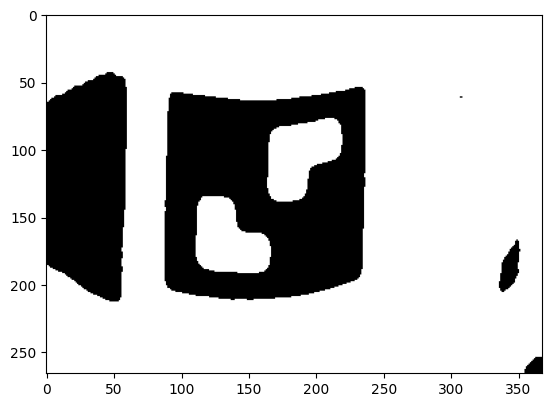

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

arucodict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)

image = cv2.imread('cup17.png', cv2.IMREAD_GRAYSCALE)
image = cv2.GaussianBlur(image, (5,5), 0)
_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

corners, ids, rejected = cv2.aruco.detectMarkers(image, arucodict)
image =  cv2.aruco.drawDetectedMarkers(image, corners, ids)
plt.imshow(image, cmap = 'gray')

[[234.  54.]
 [232. 194.]
 [ 90. 202.]
 [ 92.  59.]]
[234.0, 232.0, 90.0, 92.0] [54.0, 194.0, 202.0, 59.0]
90 59
offset: 13
offset: 3
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 0
offset: 1
offset: 1
offset: 1
offset: 1
offset: 1
offset: 1
offset: 1
offset: 1
offset: 1
offset: 2
offset: 2
offset: 2
offset: 2
offset: 2
offset: 2
offset: 2
offset: 2
offset: 3
offset: 3
offset: 3
offset: 3
offset: 3
offset: 3
offset: 3
offset: 3
offset: 3
offset: 4
offset: 4
offset: 4
offset: 4
offset: 4
offset: 4
offset: 4
offset: 4
offset: 4


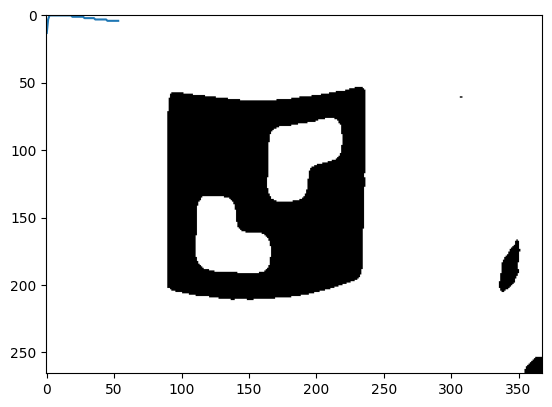

In [106]:
# loop ofer first column 
image =  np.array(image).copy()
column = image[:,0]

for i in range(len(column)-1):
    if column[i] == 255 and column[i+1]==0: 
        v_idx = i


row = image[v_idx, :]
for i in range(len(row)-1):
    if row[i] == 255 and row[i+1]==0: 
        h_idx = i

image[:, 0:h_idx] =255
corners, ids, rejected = cv2.aruco.detectMarkers(image, arucodict)
image =  cv2.aruco.drawDetectedMarkers(image, corners, ids)
tolerance = 0.1
marker = []
for obj in rejected:
    ob=obj[0] 
    dx = 0.5* (ob[0][0]- ob[2][0] + ob[1][0]- ob[3][0])
    dy = 0.5* (ob[0][1]- ob[2][1] + ob[3][1]- ob[1][1])
    if dx/image.shape[0] > 0.3: marker = obj

marker = marker[0]
print(marker)
x_vals = [ y[0] for y in marker]
y_vals = [ y[1] for y in marker]
print ( x_vals, y_vals)
corners, ids, rejected = cv2.aruco.detectMarkers(image, arucodict)
image =  cv2.aruco.drawDetectedMarkers(image, corners, ids)
fig = plt.imshow(image, cmap = 'gray')
# set min(x_vals as origin)
x_origin = image.shape[1]
for i,val in enumerate(x_vals):
    x_origin = val if val < x_origin else x_origin
    y_origin = y_vals[i]
x_origin = int(x_origin)
y_origin = int(y_origin)
print(x_origin, y_origin)
offsets = []
for x in range(int(max(x_vals) - x_origin)): #loop over marker with
    # determine y-offset
    val = image[x, y_origin]
    if val == 255 and any(image[:, x]==0) :
        offset = 0
        rim = False
        while rim == False:
            var = image[int(y_origin) + offset , x]
            if image[int(y_origin) + offset , x] == 0:
                rim = True
            else:
                offset +=1
        print(f"offset: {offset}")
        offsets.append(offset)
    elif val == 0 and any(image[:,x] == 255):
        offset = 0
        rim = False
        while rim == False:
            var = image[int(y_origin) + offset , x]
            if image[int(y_origin) + offset , x] == 0:
                rim = True
            else:
                offset -=1
        print(f"offset: {offset}")
        offsets.append(offset)




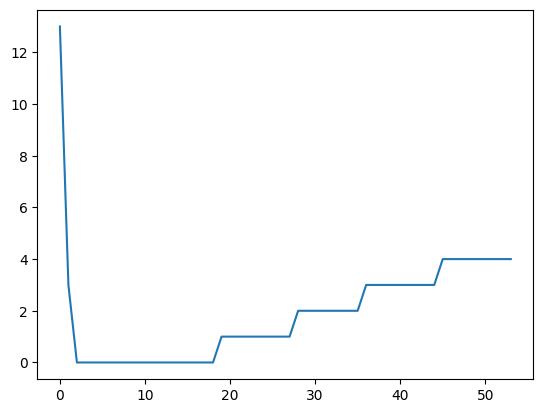

In [107]:
fig2 = plt.plot(offsets)